# Permutation Importance and Dealing with Correlated Features

In [1]:
%load_ext watermark
%watermark -a "Sebastian Raschka" -u -d -p numpy,pandas,matplotlib,sklearn,mlxtend

Author: Sebastian Raschka

Last updated: 2021-12-30

numpy     : 1.21.5
pandas    : 1.3.5
matplotlib: 3.5.1
sklearn   : 1.0.2
mlxtend   : 0.20.0.dev0



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import numpy as np


np.random.seed(123)

y = np.zeros(1000)
y[:500] = 1

x1 = np.random.randn(1000)

x2 = np.empty(1000)
x2[:500] = np.random.randn(500)
x2[500:] = np.random.randn(500)+4

x3 = x2 

X = np.vstack((x3, x2, x1)).swapaxes(1, 0)
X.shape

(1000, 3)

In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=123, 
                     stratify=y)

In [5]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=10,
                                random_state=123,
                                max_features=2)

forest.fit(X_train, y_train)

print('Training accuracy:', np.mean(forest.predict(X_train) == y_train)*100)
print('Test accuracy:', np.mean(forest.predict(X_test) == y_test)*100)

Training accuracy: 99.71428571428571
Test accuracy: 97.66666666666667


In [6]:
corr = np.corrcoef(X_train.T)
corr.shape

(3, 3)

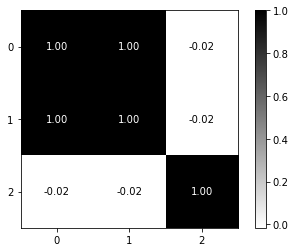

In [7]:
from mlxtend.plotting import heatmap


heatmap(corr, cmap='binary')
plt.savefig('5.pdf')
plt.show()

In [8]:
from mlxtend.evaluate import feature_importance_permutation


imp_vals, imp_all = feature_importance_permutation(
    predict_method=forest.predict, 
    X=X_test,
    y=y_test,
    metric='accuracy',
    num_rounds=50,
    seed=123)

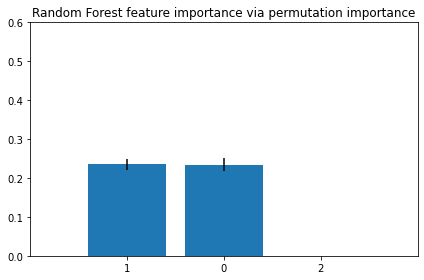

In [9]:
std = np.std(imp_all, axis=1)
indices = np.argsort(imp_vals)[::-1]

plt.figure()
plt.title("Random Forest feature importance via permutation importance")
plt.bar(range(X_train.shape[1]), imp_vals[indices], yerr=std[indices])

plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.ylim([0, 0.6])

plt.tight_layout()
plt.savefig('6.pdf')
plt.show()

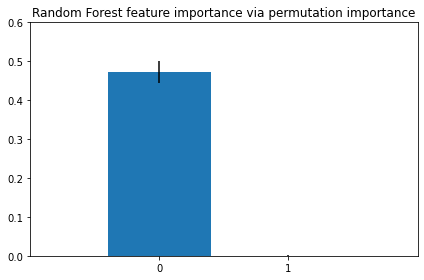

In [10]:
X_train = X_train[:, 1:]
X_test = X_test[:, 1:]

forest = RandomForestClassifier(n_estimators=10,
                                random_state=123,
                                max_features=2)

forest.fit(X_train, y_train)

imp_vals, imp_all = feature_importance_permutation(
    predict_method=forest.predict, 
    X=X_test,
    y=y_test,
    metric='accuracy',
    num_rounds=50,
    seed=123)

std = np.std(imp_all, axis=1)
indices = np.argsort(imp_vals)[::-1]

plt.figure()
plt.title("Random Forest feature importance via permutation importance")
plt.bar(range(X_train.shape[1]), imp_vals[indices], yerr=std[indices])

plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.ylim([0, 0.6])

plt.tight_layout()
plt.savefig('7.pdf')
plt.show()